In [ ]:
#Load Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE, mutual_info_classif

## **Feature Selection Using Lasso Regression & Random Forests**

This notebook selects the most important features using **Lasso Regression (L1 Regularization) and Random Forest Feature Importance**.

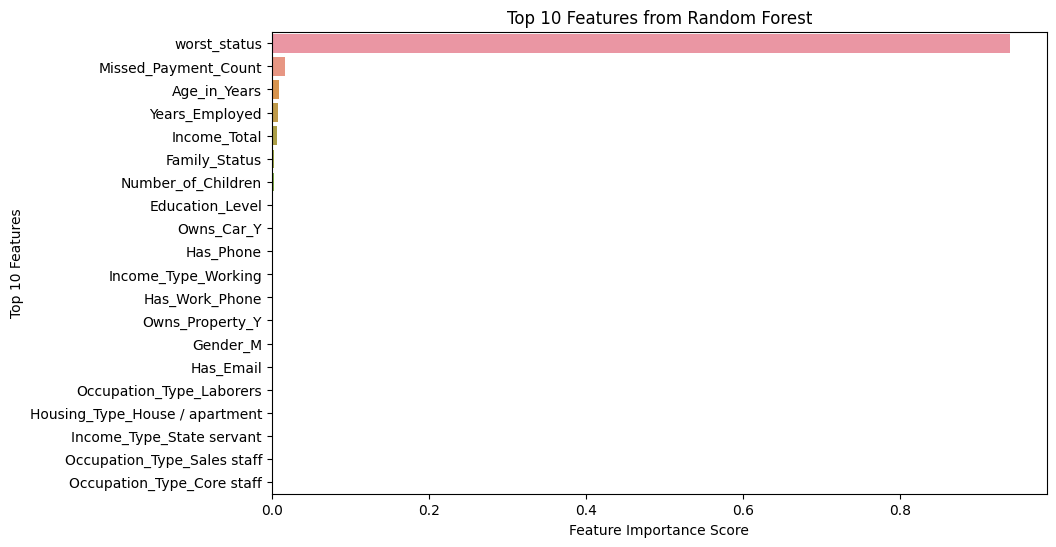

In [ ]:
# Load the Processed Dataset
dataset_path = r"c:/Users/vagel/Desktop/C.R/credit_risk_analysis_processed.csv"
merged_data = pd.read_csv(dataset_path)

# Drop non-numeric and ID columns before feature selection
X = merged_data.drop(columns=["Applicant_ID", "Credit_Status"])
y = merged_data["Credit_Status"]

# Step 1: Remove Highly Correlated Features
correlation_matrix = X.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
X = X.drop(columns=high_correlation_features)

# Step 2: Feature Importance from Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Step 3: Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=20, step=1)
rfe_selector.fit(X, y)
selected_features_rfe = X.columns[rfe_selector.support_]

# Step 4: Mutual Information for Categorical Features
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_scores_df = pd.DataFrame({"Feature": X.columns, "Mutual_Information": mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="Mutual_Information", ascending=False)

# Step 5: Select Final Features
selected_features = list(set(selected_features_rfe) | set(feature_importances["Feature"][:10]) | set(mi_scores_df["Feature"][:10]))
X_selected = X[selected_features]


# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(y=feature_importances["Feature"][:20], x=feature_importances["Importance"][:20])
plt.xlabel("Feature Importance Score")
plt.ylabel("Top 10 Features")
plt.title("Top 10 Features from Random Forest")
plt.show()


In [24]:
# Remove 'worst_status' from the selected features list
selected_features = [feature for feature in selected_features if feature != "worst_status"]

# Create the final dataset excluding 'worst_status'
final_dataset = merged_data[selected_features + ["Credit_Status"]]

# Define file path for saving (adjusted for local Windows path format)
final_dataset_path = r"C:\Users\vagel\Desktop\C.R\Dataset\final_credit_risk_dataset.csv"

# Save to CSV without the ID column
final_dataset.to_csv(final_dataset_path, index=False)
